<a href="https://colab.research.google.com/github/MaJu502/proyectoDL/blob/main/Resnet_pytorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Deep Learning
- Diego Cordova 20212
- Marco Jurado 20308
- Cristian Aguirre 20231
- Paola Contreras 20213
- Paola de Leon 20361

## Carga de Dataset

In [3]:
!gdown 1BoNWFSXxtN74PgLcBxfGWyeKUOfevQEP

Downloading...
From: https://drive.google.com/uc?id=1BoNWFSXxtN74PgLcBxfGWyeKUOfevQEP
To: /content/kaggle.json
100% 64.0/64.0 [00:00<00:00, 379kB/s]


In [4]:
! pip install kaggle

In [5]:
!ls -a /root/

.   .bashrc  .config   .jupyter  .launchpadlib	.npm	  .tmux.conf
..  .cache   .ipython  .keras	 .local		.profile  .wget-hsts


In [6]:
!mkdir /root/.kaggle/

In [7]:
!mv /content/kaggle.json /root/.kaggle/


In [8]:
ls /root/.kaggle/


kaggle.json


In [9]:
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 99% 119M/121M [00:07<00:00, 20.2MB/s]
100% 121M/121M [00:07<00:00, 17.6MB/s]


In [11]:
%cd /content
!unzip -q face-expression-recognition-dataset.zip

/content


# Modelo

In [12]:
import os
import shutil

# Ruta de la carpeta que deseas eliminar
folder_path = './images/train/disgust'

# Elimina todas las imágenes en la carpeta
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print(f'Error al eliminar {file_path}: {e}')

# Elimina la carpeta misma
try:
    os.rmdir(folder_path)
except Exception as e:
    print(f'Error al eliminar la carpeta {folder_path}: {e}')


In [13]:
# Ruta de la carpeta que deseas eliminar
folder_path = './images/validation/disgust'

# Elimina todas las imágenes en la carpeta
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print(f'Error al eliminar {file_path}: {e}')

# Elimina la carpeta misma
try:
    os.rmdir(folder_path)
except Exception as e:
    print(f'Error al eliminar la carpeta {folder_path}: {e}')

In [14]:
import os
import random
import shutil

# Ruta de la carpeta que deseas modificar
folder_path = './images/train/happy'

# Lista de archivos en la carpeta
file_list = os.listdir(folder_path)

# Número de imágenes que deseas eliminar
num_images_to_delete = 3000

# Verifica si hay suficientes imágenes para eliminar
if len(file_list) < num_images_to_delete:
    print(f'No hay suficientes imágenes en {folder_path} para eliminar.')
else:
    # Selecciona aleatoriamente las imágenes que se eliminarán
    images_to_delete = random.sample(file_list, num_images_to_delete)

    # Elimina las imágenes seleccionadas
    for file_name in images_to_delete:
        file_path = os.path.join(folder_path, file_name)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print(f'Error al eliminar {file_path}: {e}')

    print(f'Se han eliminado {num_images_to_delete} imágenes de {folder_path}.')


Se han eliminado 3000 imágenes de ./images/train/happy.


In [15]:
import cv2
import os
import numpy as np

root_dir = './images/train/'

# Lista de emociones
emotions = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']
unique_shapes_by_emotion = {emotion: [] for emotion in emotions}

for emotion in emotions:
    emotion_dir = os.path.join(root_dir, emotion)
    image_files = os.listdir(emotion_dir)

    for image_file in image_files:
        image_path = os.path.join(emotion_dir, image_file)
        image = cv2.imread(image_path)
        shape = image.shape
        if shape not in unique_shapes_by_emotion[emotion]:
            unique_shapes_by_emotion[emotion].append(shape)

for emotion, shapes in unique_shapes_by_emotion.items():
    print(f"Shapes únicos para la emoción '{emotion}':")
    for shape in shapes:
        print(shape)


Shapes únicos para la emoción 'angry':
(48, 48, 3)
Shapes únicos para la emoción 'fear':
(48, 48, 3)
Shapes únicos para la emoción 'happy':
(48, 48, 3)
Shapes únicos para la emoción 'neutral':
(48, 48, 3)
Shapes únicos para la emoción 'sad':
(48, 48, 3)
Shapes únicos para la emoción 'surprise':
(48, 48, 3)


## Loader para el Modelo

In [16]:
import torch
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torchvision import transforms as T

batch_size = 128
base_path = "./images/"

train_augs = T.Compose([T.RandomHorizontalFlip(p = 0.5),T.RandomRotation(degrees = (-20,+20)),T.ToTensor()])
#To tensor in pytorch converts image from numpy or PIL into pytorch tensors also it will convert (h,w,c)->(c,h,w)
valid_augs = T.Compose([T.ToTensor()])


# Crear conjuntos de datos
train_dataset = ImageFolder(base_path + "train", transform =train_augs)
validation_dataset = ImageFolder(base_path + "validation", transform =valid_augs)

# Crear generadores de lotes (DataLoaders)
trainloader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle = True)
validloader = torch.utils.data.DataLoader(validation_dataset,batch_size=batch_size)

## Se preparan los datos para CUDA

## Entreno del Modelo

In [17]:
!pip install scikit-learn

In [18]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.7 MB/s eta 0:00:00


In [19]:
import timm
from torch import nn

class FaceModel(nn.Module):
    def __init__(self):
        super(FaceModel,self).__init__()
        self.eff_net = timm.create_model('resnet34',pretrained = True,num_classes = 7)
    def forward(self,images,labels = None):
        logits = self.eff_net(images)
        if labels != None:
            loss = nn.CrossEntropyLoss()(logits,labels)
            return logits,loss
        return logits

modelo = FaceModel()

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

In [20]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")
modelo = modelo.to(device)

device_in_model = 'cpu' if False in [i.is_cuda for i in modelo.parameters()] else 'cuda'
print('model using', device_in_model)

Computation device: cuda

model using cuda


In [21]:
def multiclass_accuracy(y_pred,y_true):
    top_p,top_class = y_pred.topk(1,dim = 1)
    equals = top_class == y_true.view(*top_class.shape)
    return torch.mean(equals.type(torch.FloatTensor))

In [22]:
from tqdm import tqdm

In [23]:
epoch = 60


def train_fn(model,dataloader,optimizer,current_epo):
    model.train()
    total_loss = 0.0
    total_acc = 0.0
    tk = tqdm(dataloader,desc = "EPOCHS" + "[TRAIN]" + str(current_epo+1) + "/"+ str(epoch))
    for t,data in enumerate(tk):
        images,labels = data
        images,labels = images.to(device),labels.to(device)

        optimizer.zero_grad()
        logits,loss = model(images,labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_acc += multiclass_accuracy(logits,labels)
        tk.set_postfix({'loss':'%6f' %float(total_loss/(t+1)),'acc':'%6f' %float(total_acc/(t+1))})
    return total_loss/len(dataloader),total_acc/len(dataloader)



In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def eval_fn(model, dataloader, current_epo):
    model.eval()
    total_loss = 0.0
    total_acc = 0.0
    all_true_labels = []
    all_predicted_labels = []

    tk = tqdm(dataloader, desc="EPOCH" + "[VALID]" + str(current_epo + 1) + "/" + str(epoch))

    for t, data in enumerate(tk):
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        logits, loss = model(images, labels)

        total_loss += loss.item()
        total_acc += multiclass_accuracy(logits, labels)

        # Collect true labels and predicted labels
        all_true_labels.extend(labels.cpu().numpy())
        all_predicted_labels.extend(logits.argmax(1).cpu().numpy())

        tk.set_postfix({'loss': '%6f' % float(total_loss / (t + 1)), 'acc': '%6f' % float(total_acc / (t + 1))})

    # Calculate and display the confusion matrix
    confusion = confusion_matrix(all_true_labels, all_predicted_labels)
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    return total_loss / len(dataloader), total_acc / len(dataloader)




In [26]:
optimizer = torch.optim.Adam(modelo.parameters(),lr = 0.0001)

EPOCH[VALID]1/60: 100%|██████████| 55/55 [00:04<00:00, 13.43it/s, loss=1.785401, acc=0.249412]


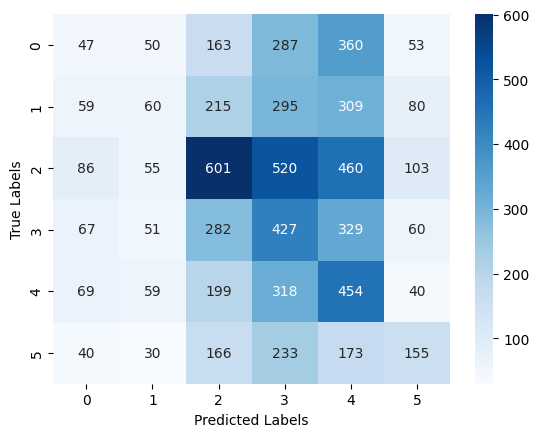

Saved Best Valid Loss


EPOCH[VALID]2/60: 100%|██████████| 55/55 [00:03<00:00, 15.60it/s, loss=1.666715, acc=0.333460]


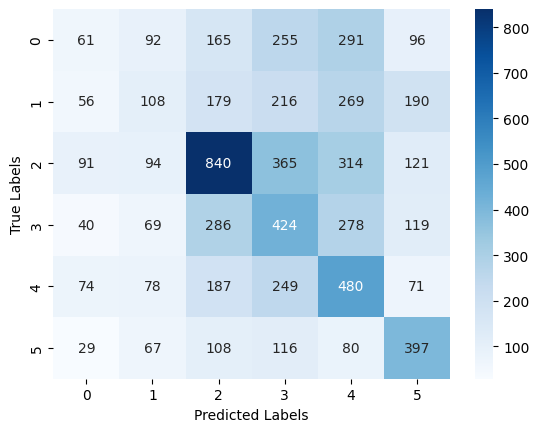

Saved Best Valid Loss


EPOCH[VALID]3/60: 100%|██████████| 55/55 [00:03<00:00, 16.08it/s, loss=1.566610, acc=0.386707]


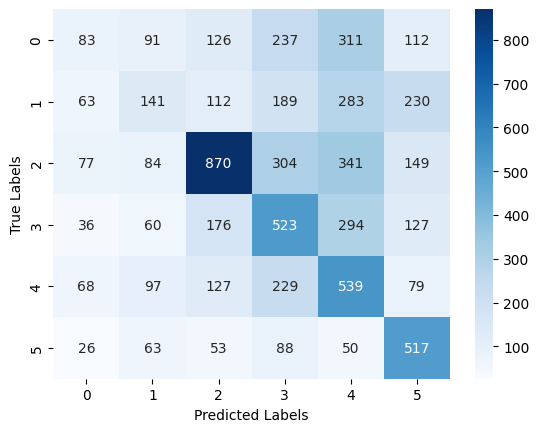

Saved Best Valid Loss


EPOCH[VALID]4/60: 100%|██████████| 55/55 [00:03<00:00, 16.24it/s, loss=1.458839, acc=0.424772]


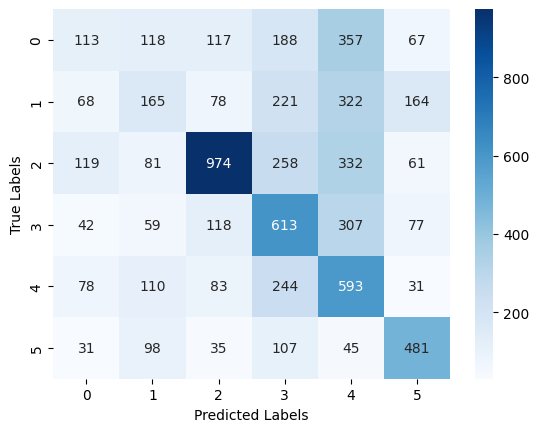

Saved Best Valid Loss


EPOCH[VALID]5/60: 100%|██████████| 55/55 [00:03<00:00, 16.05it/s, loss=1.390560, acc=0.458576]


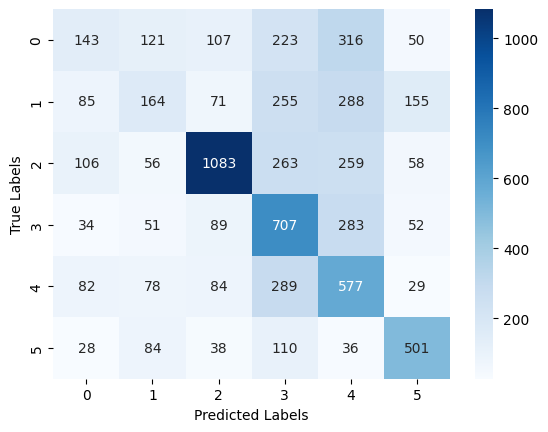

Saved Best Valid Loss


EPOCH[VALID]6/60: 100%|██████████| 55/55 [00:03<00:00, 15.88it/s, loss=1.345320, acc=0.473636]


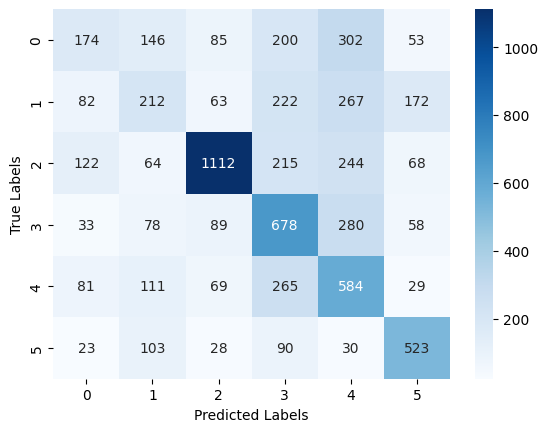

Saved Best Valid Loss


EPOCH[VALID]7/60: 100%|██████████| 55/55 [00:03<00:00, 15.80it/s, loss=1.285464, acc=0.507439]


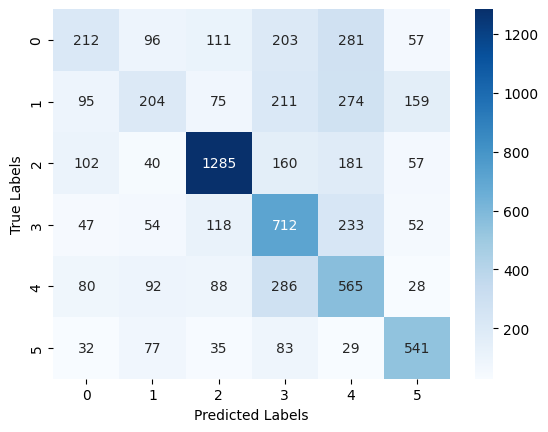

Saved Best Valid Loss


EPOCH[VALID]8/60: 100%|██████████| 55/55 [00:03<00:00, 16.09it/s, loss=1.263769, acc=0.510432]


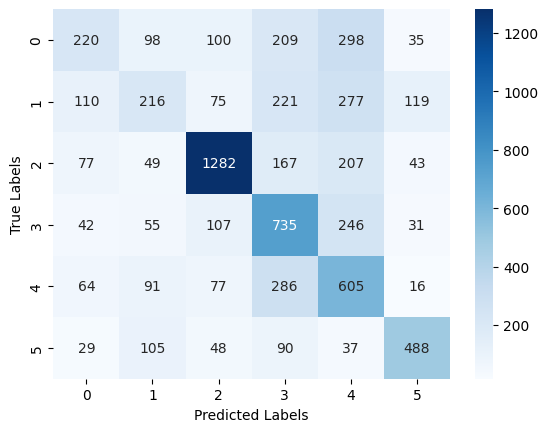

Saved Best Valid Loss


EPOCH[VALID]9/60: 100%|██████████| 55/55 [00:03<00:00, 15.34it/s, loss=1.244961, acc=0.517524]


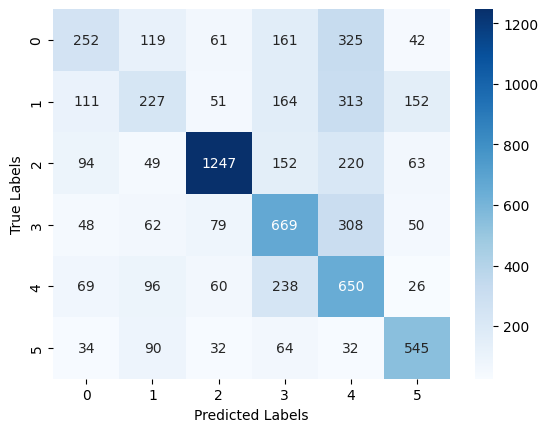

Saved Best Valid Loss


EPOCH[VALID]10/60: 100%|██████████| 55/55 [00:03<00:00, 14.53it/s, loss=1.205900, acc=0.539393]


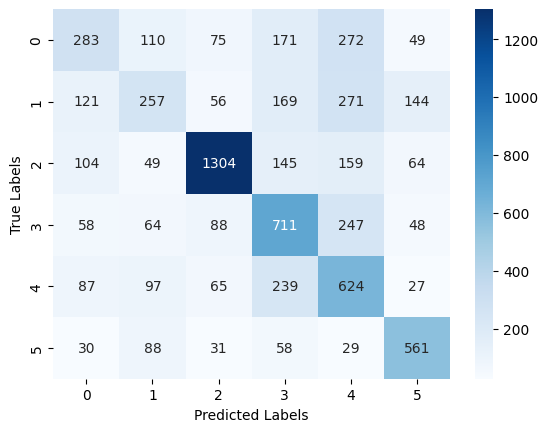

Saved Best Valid Loss


EPOCH[VALID]11/60: 100%|██████████| 55/55 [00:04<00:00, 13.11it/s, loss=1.186908, acc=0.542240]


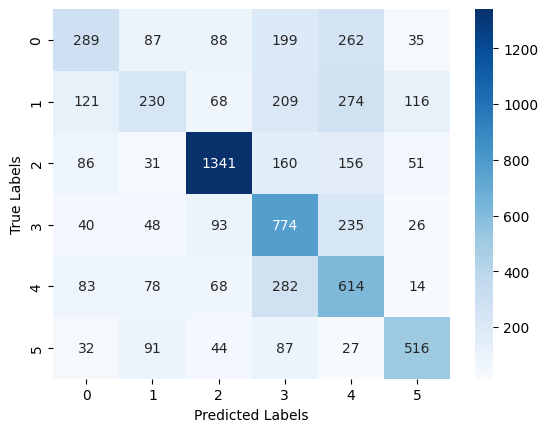

Saved Best Valid Loss


EPOCH[VALID]12/60: 100%|██████████| 55/55 [00:04<00:00, 12.36it/s, loss=1.178504, acc=0.548196]


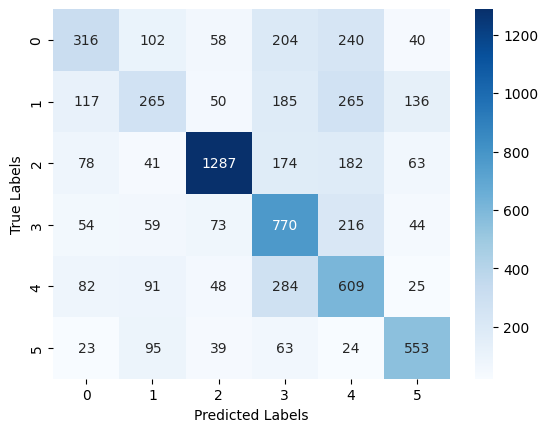

Saved Best Valid Loss


EPOCH[VALID]13/60: 100%|██████████| 55/55 [00:04<00:00, 11.02it/s, loss=1.167520, acc=0.556435]


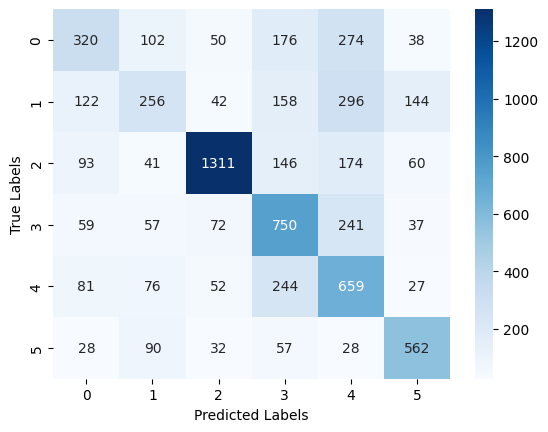

Saved Best Valid Loss


EPOCH[VALID]14/60: 100%|██████████| 55/55 [00:04<00:00, 12.66it/s, loss=1.141605, acc=0.562969]


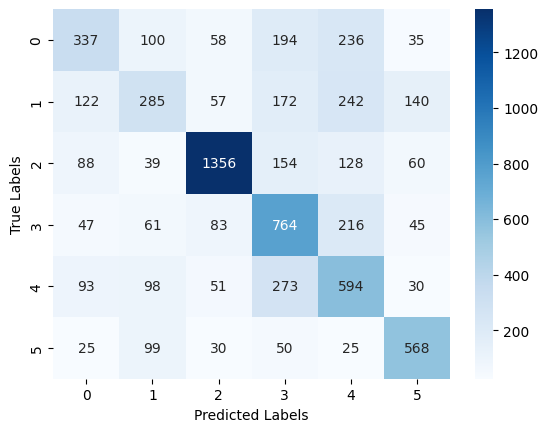

Saved Best Valid Loss


EPOCH[VALID]15/60: 100%|██████████| 55/55 [00:03<00:00, 14.26it/s, loss=1.140175, acc=0.564535]


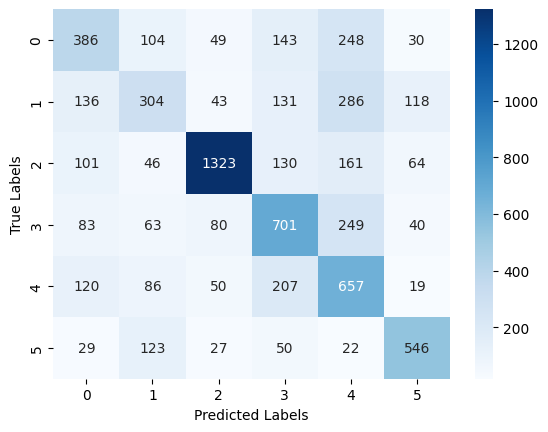

Saved Best Valid Loss


EPOCH[VALID]16/60: 100%|██████████| 55/55 [00:03<00:00, 15.24it/s, loss=1.141099, acc=0.573900]


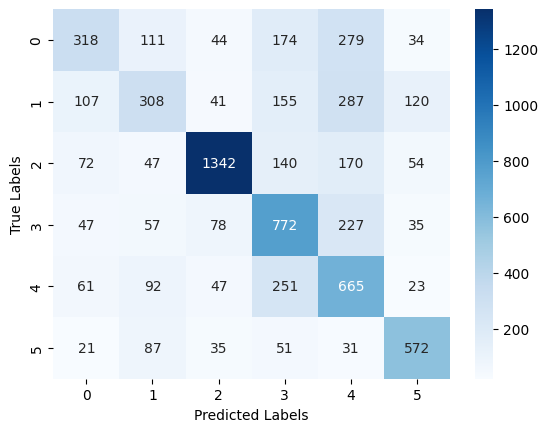

EPOCH[VALID]17/60: 100%|██████████| 55/55 [00:03<00:00, 14.88it/s, loss=1.116313, acc=0.573193]


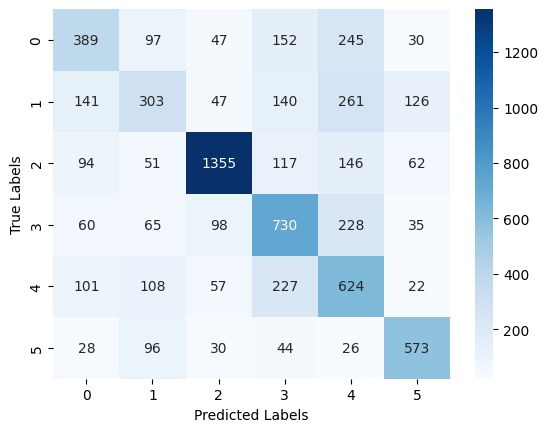

Saved Best Valid Loss


EPOCH[VALID]18/60: 100%|██████████| 55/55 [00:03<00:00, 14.82it/s, loss=1.099167, acc=0.584983]


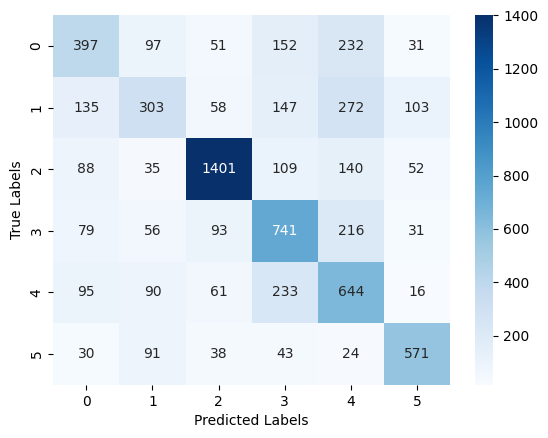

Saved Best Valid Loss


EPOCH[VALID]19/60: 100%|██████████| 55/55 [00:03<00:00, 15.17it/s, loss=1.102107, acc=0.581154]


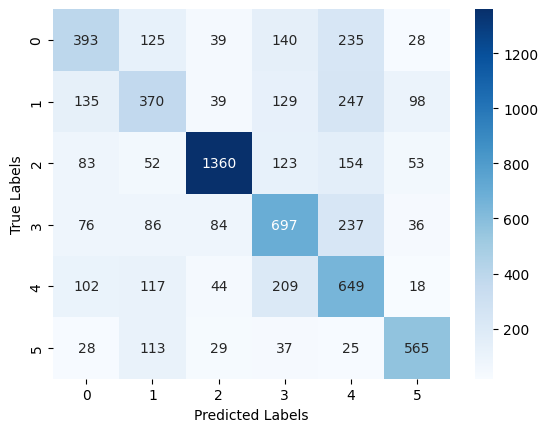

EPOCH[VALID]20/60: 100%|██████████| 55/55 [00:03<00:00, 14.85it/s, loss=1.086140, acc=0.590096]


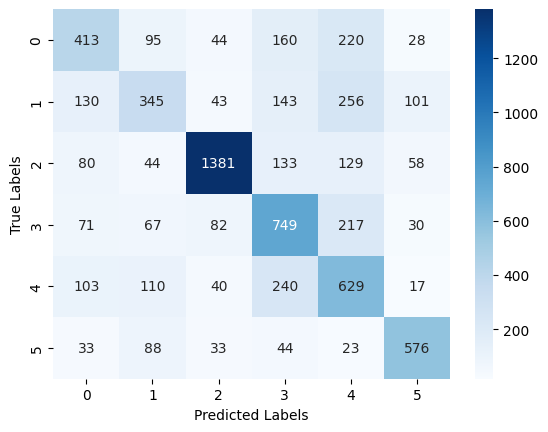

Saved Best Valid Loss


EPOCH[VALID]21/60: 100%|██████████| 55/55 [00:03<00:00, 13.94it/s, loss=1.085354, acc=0.590235]


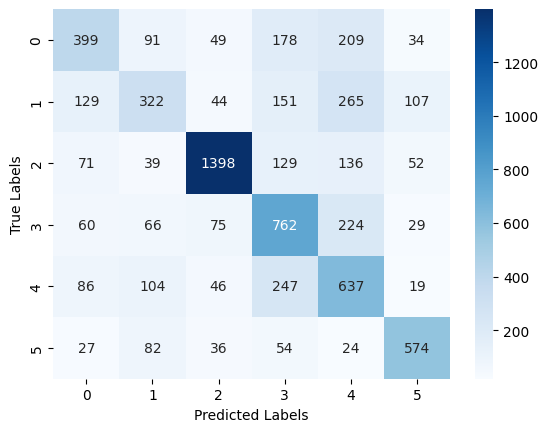

Saved Best Valid Loss


EPOCH[VALID]22/60: 100%|██████████| 55/55 [00:04<00:00, 12.35it/s, loss=1.081528, acc=0.591801]


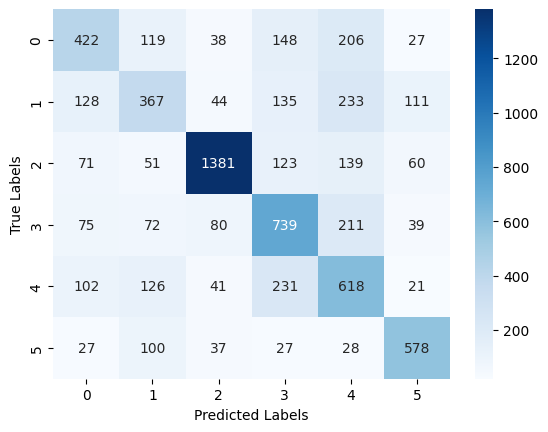

Saved Best Valid Loss


EPOCH[VALID]23/60: 100%|██████████| 55/55 [00:04<00:00, 11.84it/s, loss=1.087730, acc=0.595210]


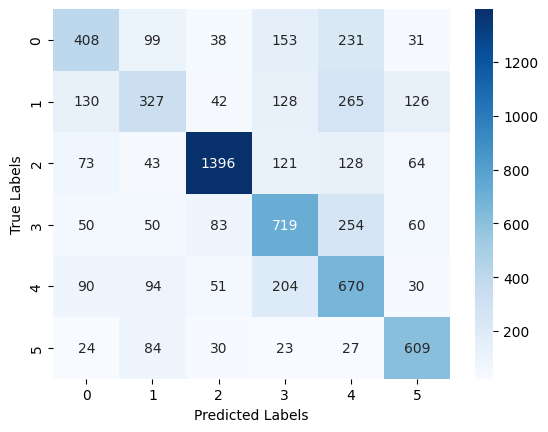

EPOCH[VALID]24/60: 100%|██████████| 55/55 [00:04<00:00, 13.00it/s, loss=1.079016, acc=0.599894]


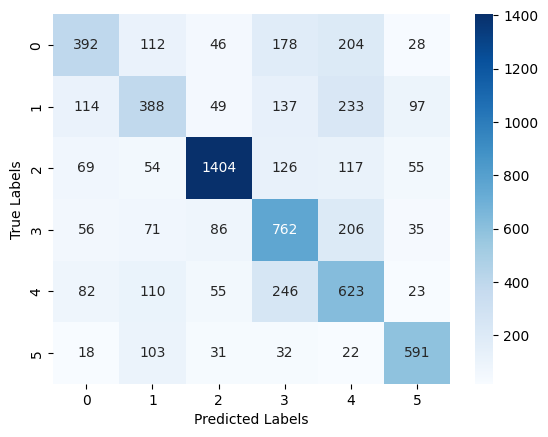

Saved Best Valid Loss


EPOCH[VALID]25/60: 100%|██████████| 55/55 [00:03<00:00, 14.71it/s, loss=1.074511, acc=0.602874]


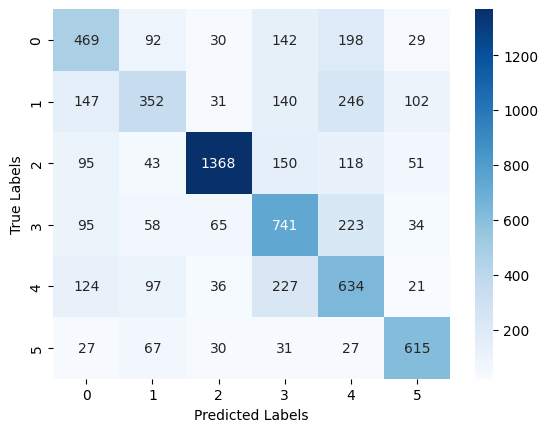

Saved Best Valid Loss


EPOCH[VALID]26/60: 100%|██████████| 55/55 [00:03<00:00, 14.30it/s, loss=1.069625, acc=0.606712]


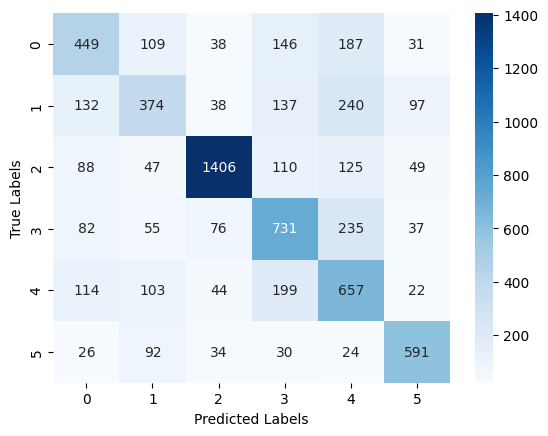

Saved Best Valid Loss


EPOCH[VALID]27/60: 100%|██████████| 55/55 [00:03<00:00, 14.56it/s, loss=1.073273, acc=0.608272]


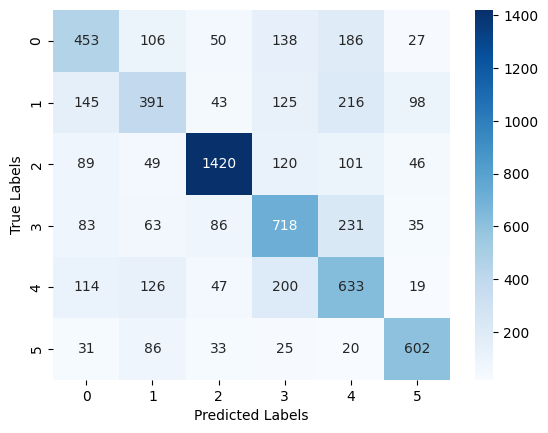

EPOCH[VALID]28/60: 100%|██████████| 55/55 [00:03<00:00, 14.50it/s, loss=1.076544, acc=0.607997]


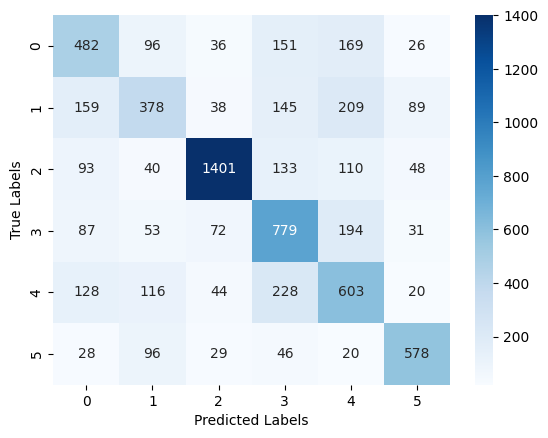

EPOCH[VALID]29/60: 100%|██████████| 55/55 [00:03<00:00, 14.53it/s, loss=1.093701, acc=0.611258]


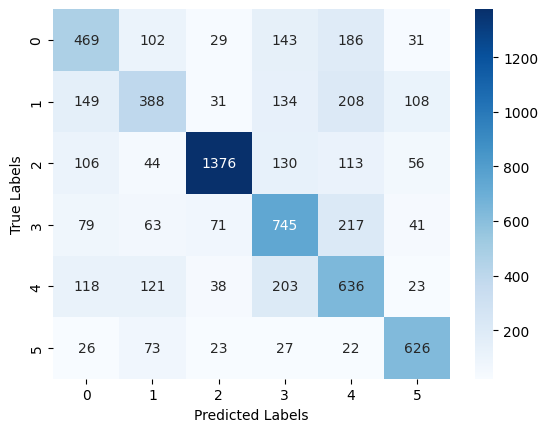

EPOCH[VALID]30/60: 100%|██████████| 55/55 [00:03<00:00, 14.59it/s, loss=1.080651, acc=0.611393]


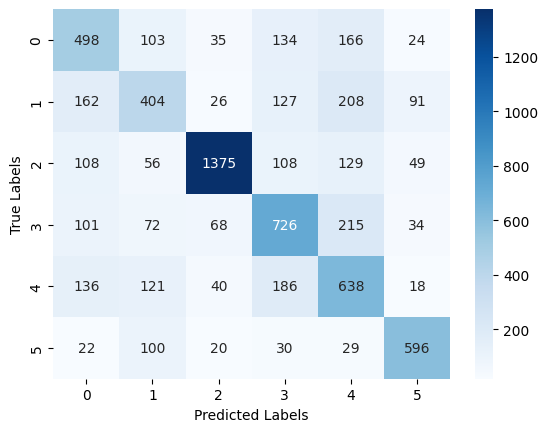

EPOCH[VALID]31/60: 100%|██████████| 55/55 [00:04<00:00, 13.05it/s, loss=1.083138, acc=0.613108]


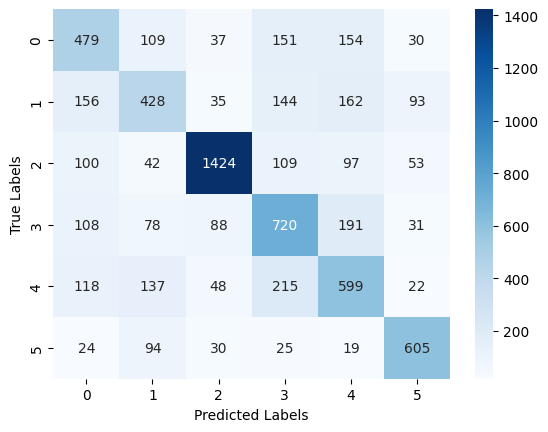

EPOCH[VALID]32/60: 100%|██████████| 55/55 [00:04<00:00, 12.27it/s, loss=1.081028, acc=0.616514]


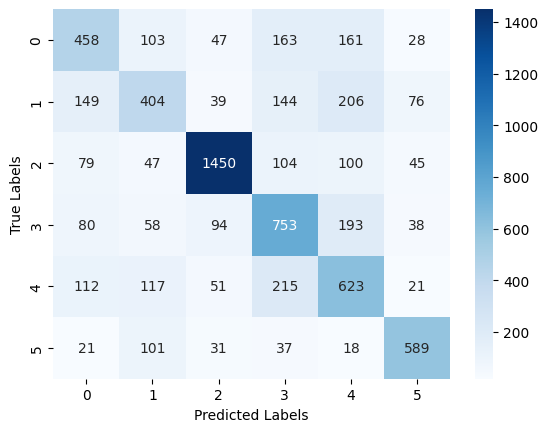

EPOCH[VALID]33/60: 100%|██████████| 55/55 [00:04<00:00, 12.47it/s, loss=1.098559, acc=0.612110]


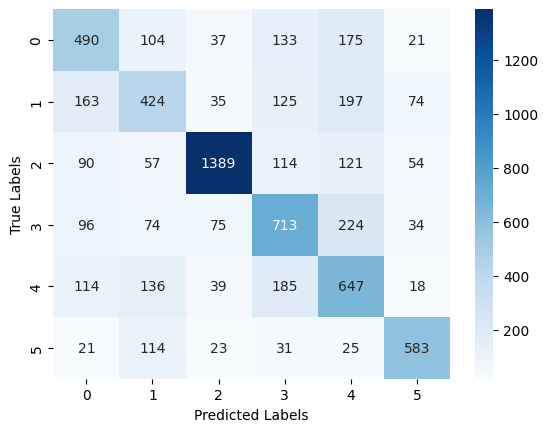

EPOCH[VALID]34/60: 100%|██████████| 55/55 [00:04<00:00, 11.49it/s, loss=1.106348, acc=0.618506]


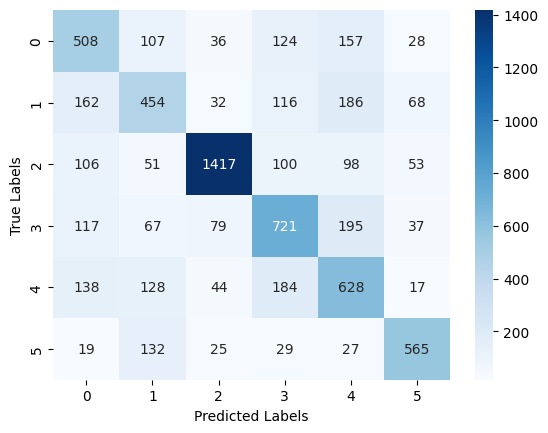

EPOCH[VALID]35/60: 100%|██████████| 55/55 [00:04<00:00, 12.17it/s, loss=1.088542, acc=0.622050]


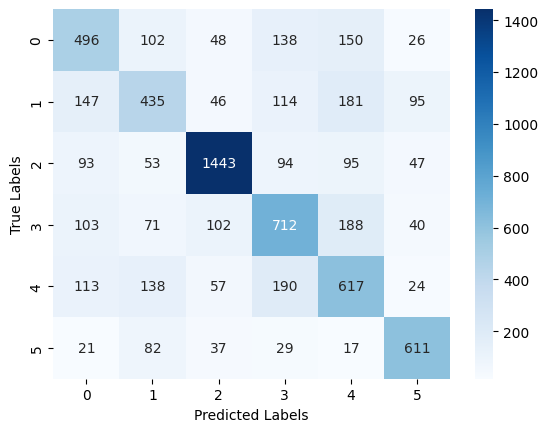

EPOCH[VALID]36/60: 100%|██████████| 55/55 [00:04<00:00, 12.10it/s, loss=1.120323, acc=0.613947]


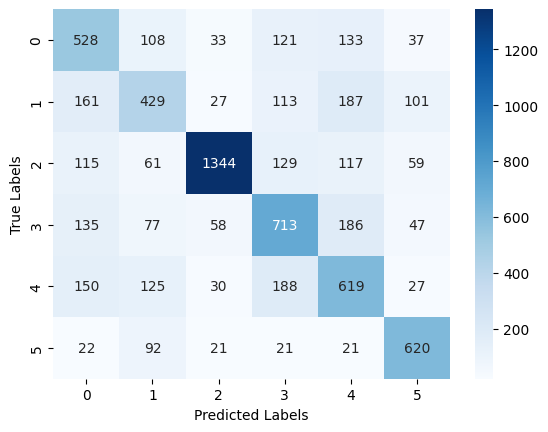

EPOCH[VALID]37/60: 100%|██████████| 55/55 [00:04<00:00, 13.41it/s, loss=1.125418, acc=0.614525]


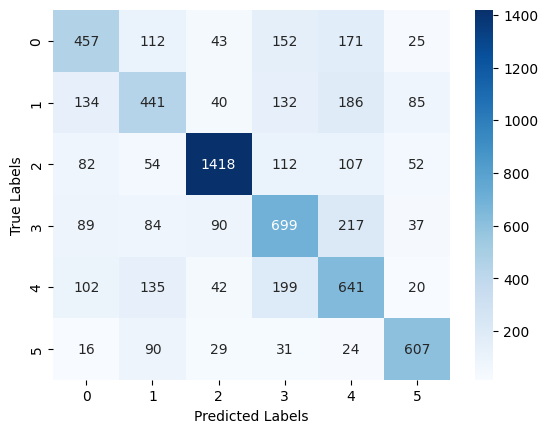

EPOCH[VALID]38/60: 100%|██████████| 55/55 [00:03<00:00, 14.19it/s, loss=1.119750, acc=0.620346]


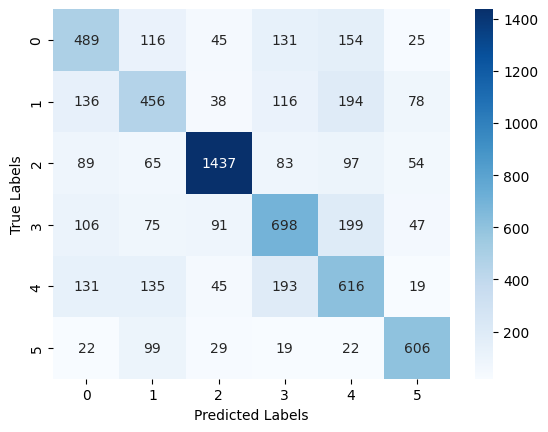

EPOCH[VALID]39/60: 100%|██████████| 55/55 [00:04<00:00, 13.70it/s, loss=1.120665, acc=0.617927]


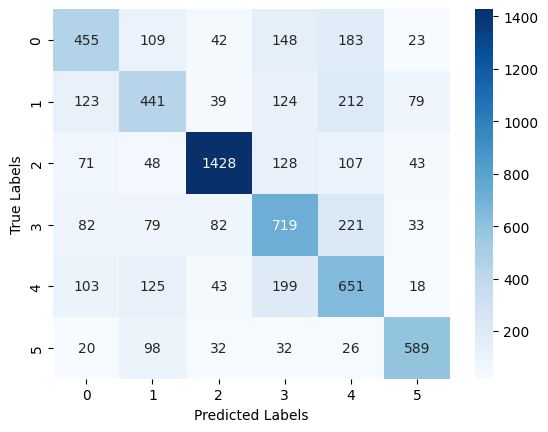

EPOCH[VALID]40/60: 100%|██████████| 55/55 [00:04<00:00, 13.54it/s, loss=1.152126, acc=0.615655]


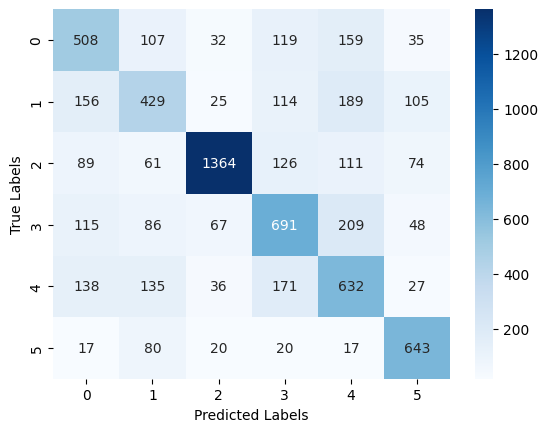

EPOCH[VALID]41/60: 100%|██████████| 55/55 [00:04<00:00, 13.71it/s, loss=1.132749, acc=0.620200]


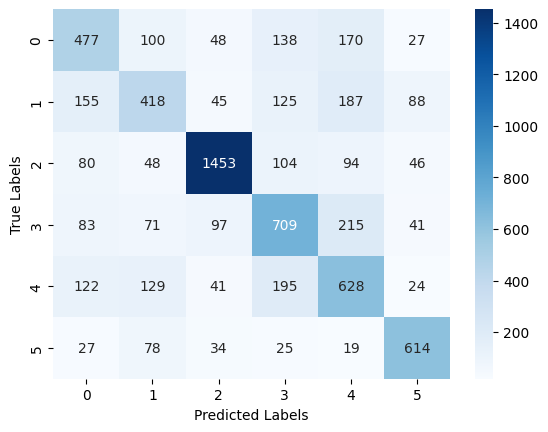

EPOCH[VALID]42/60: 100%|██████████| 55/55 [00:03<00:00, 14.01it/s, loss=1.146697, acc=0.616514]


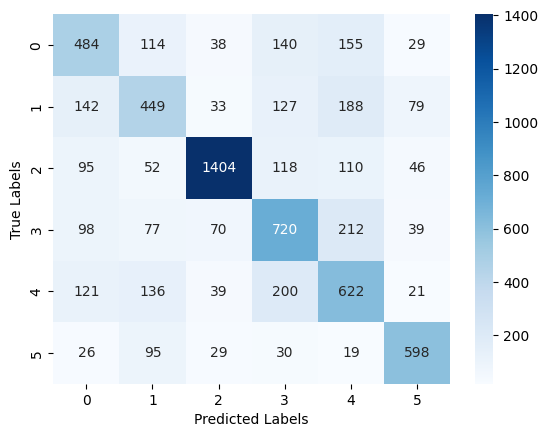

EPOCH[VALID]43/60: 100%|██████████| 55/55 [00:04<00:00, 13.03it/s, loss=1.158285, acc=0.621049]


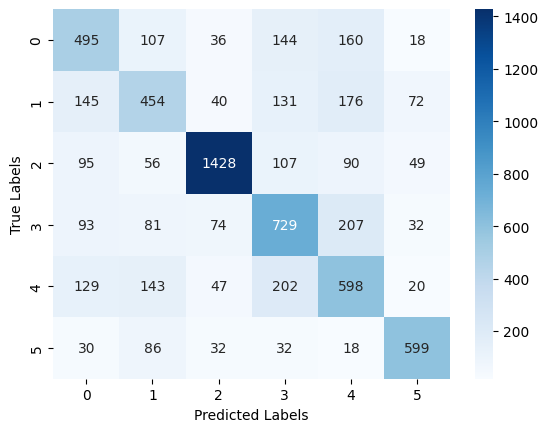

EPOCH[VALID]44/60: 100%|██████████| 55/55 [00:04<00:00, 13.14it/s, loss=1.181222, acc=0.619916]


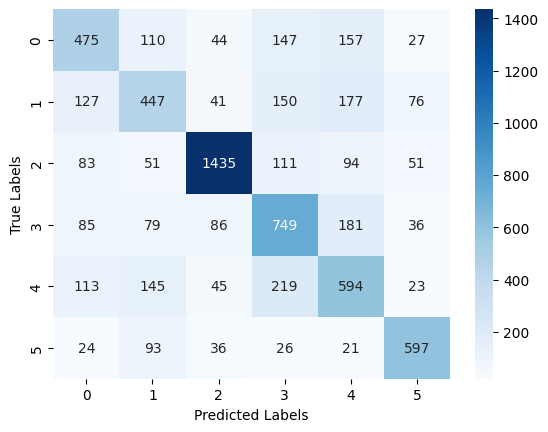

EPOCH[VALID]45/60: 100%|██████████| 55/55 [00:04<00:00, 12.52it/s, loss=1.196678, acc=0.620065]


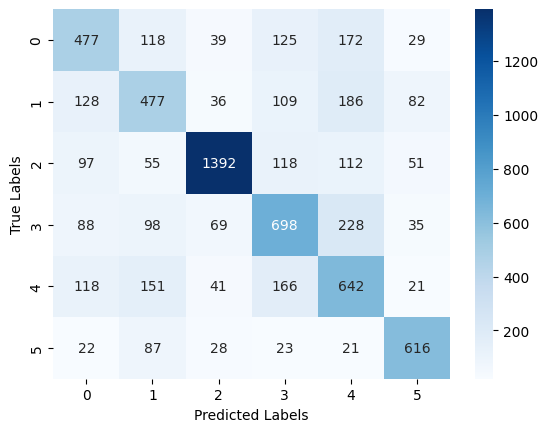

EPOCH[VALID]46/60: 100%|██████████| 55/55 [00:04<00:00, 11.28it/s, loss=1.252074, acc=0.603739]


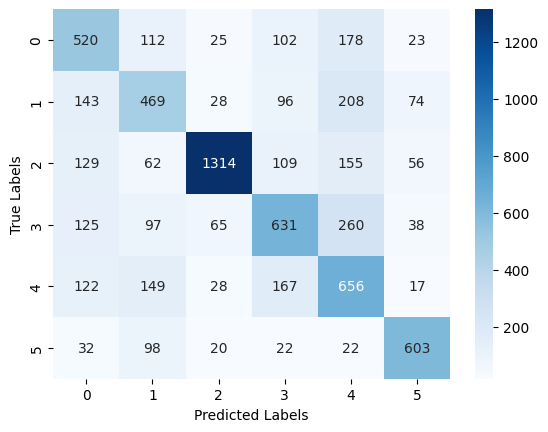

EPOCH[VALID]47/60: 100%|██████████| 55/55 [00:04<00:00, 12.49it/s, loss=1.197299, acc=0.613818]


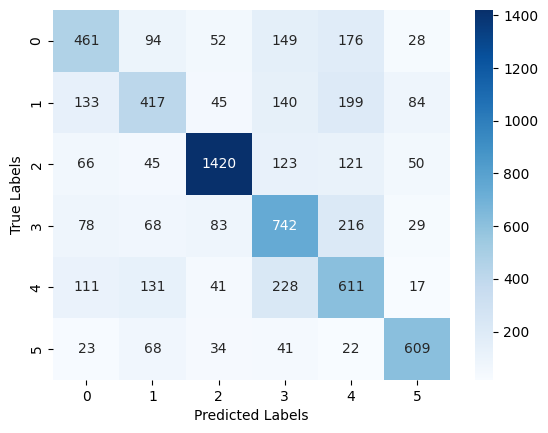

EPOCH[VALID]48/60: 100%|██████████| 55/55 [00:04<00:00, 12.20it/s, loss=1.238530, acc=0.610409]


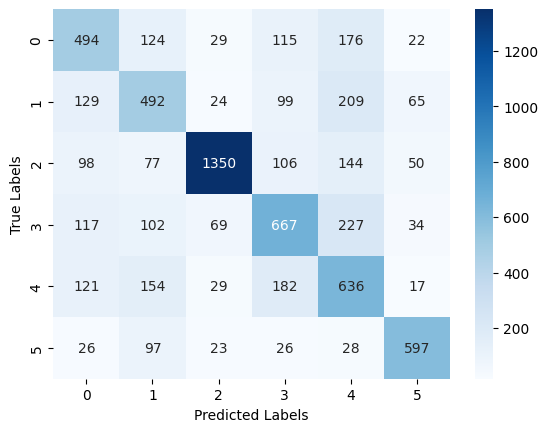

EPOCH[VALID]49/60: 100%|██████████| 55/55 [00:04<00:00, 12.43it/s, loss=1.249950, acc=0.614380]


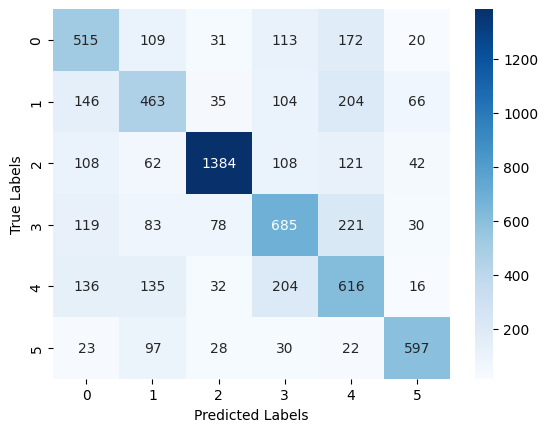

EPOCH[VALID]50/60: 100%|██████████| 55/55 [00:04<00:00, 11.75it/s, loss=1.248480, acc=0.614099]


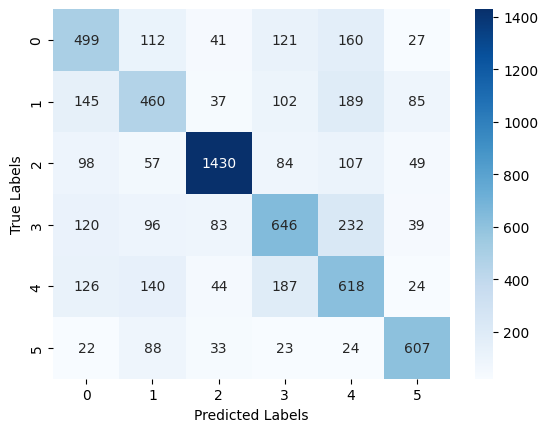

EPOCH[VALID]51/60: 100%|██████████| 55/55 [00:04<00:00, 11.15it/s, loss=1.264800, acc=0.616223]


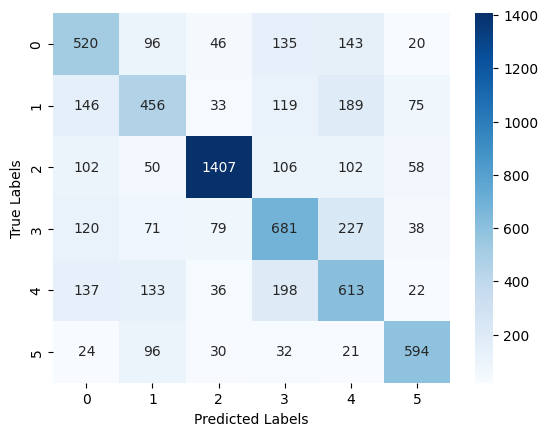

EPOCH[VALID]52/60: 100%|██████████| 55/55 [00:04<00:00, 11.50it/s, loss=1.275143, acc=0.616659]


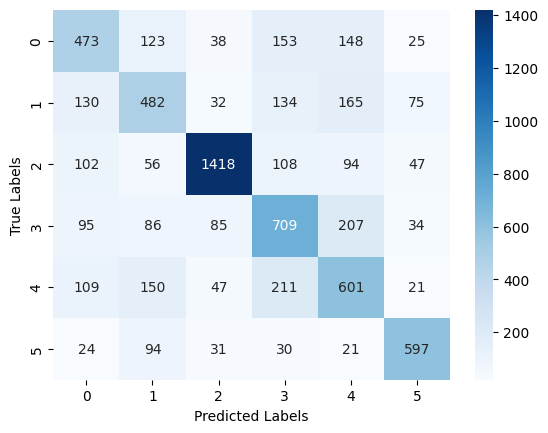

EPOCH[VALID]53/60: 100%|██████████| 55/55 [00:04<00:00, 11.03it/s, loss=1.296460, acc=0.616372]


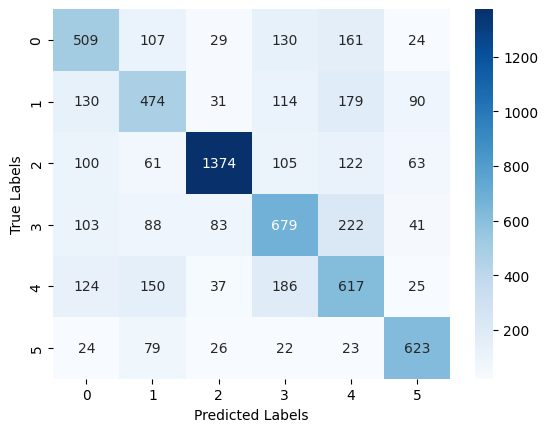

EPOCH[VALID]54/60: 100%|██████████| 55/55 [00:04<00:00, 11.20it/s, loss=1.291169, acc=0.619351]


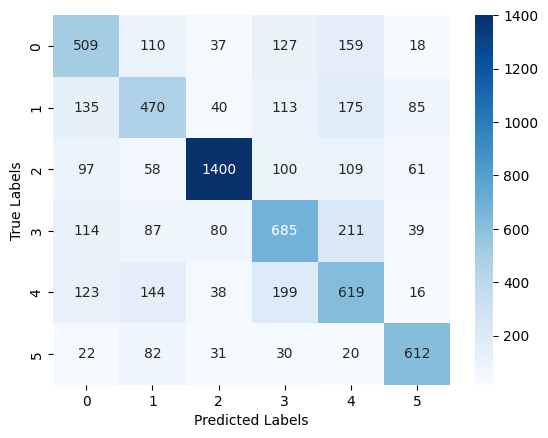

EPOCH[VALID]55/60: 100%|██████████| 55/55 [00:04<00:00, 11.30it/s, loss=1.296714, acc=0.621346]


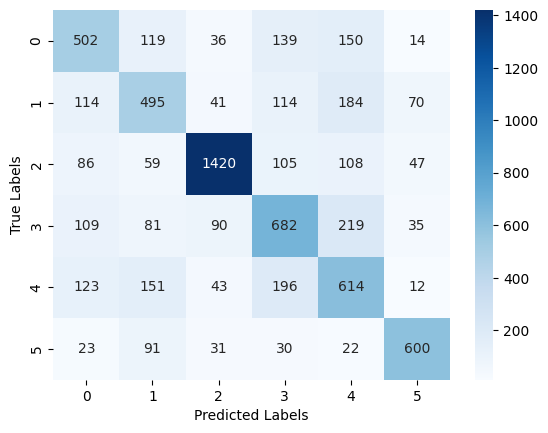

EPOCH[VALID]56/60: 100%|██████████| 55/55 [00:05<00:00, 10.97it/s, loss=1.313099, acc=0.621201]


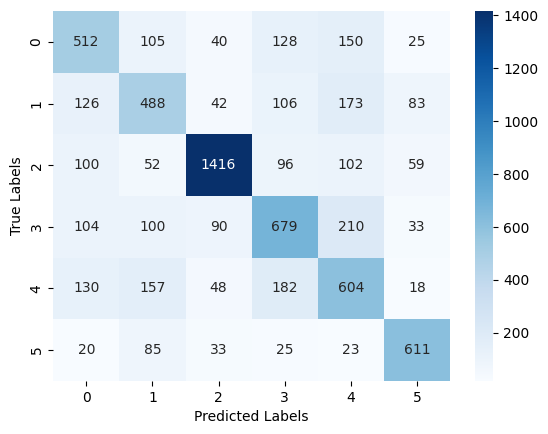

EPOCH[VALID]57/60: 100%|██████████| 55/55 [00:04<00:00, 11.14it/s, loss=1.325325, acc=0.618641]


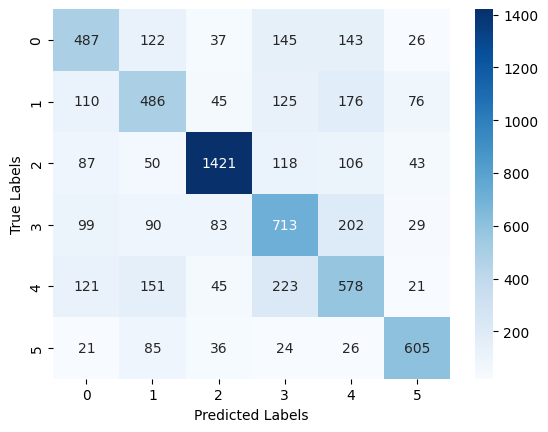

EPOCH[VALID]58/60: 100%|██████████| 55/55 [00:04<00:00, 12.33it/s, loss=1.321997, acc=0.620772]


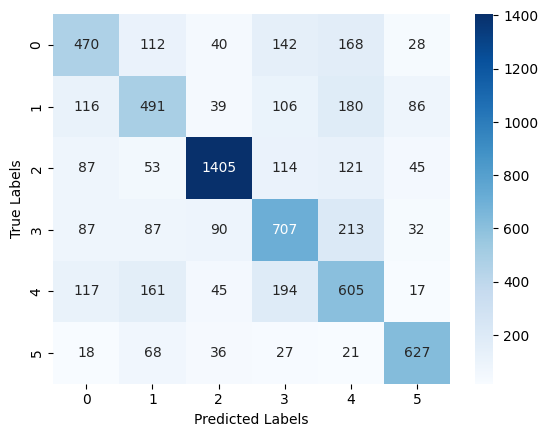

EPOCH[VALID]59/60: 100%|██████████| 55/55 [00:04<00:00, 11.29it/s, loss=1.356153, acc=0.616936]


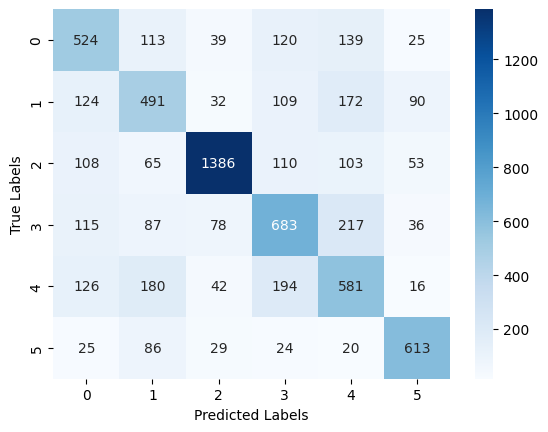

EPOCH[VALID]60/60: 100%|██████████| 55/55 [00:04<00:00, 11.13it/s, loss=1.348606, acc=0.619355]


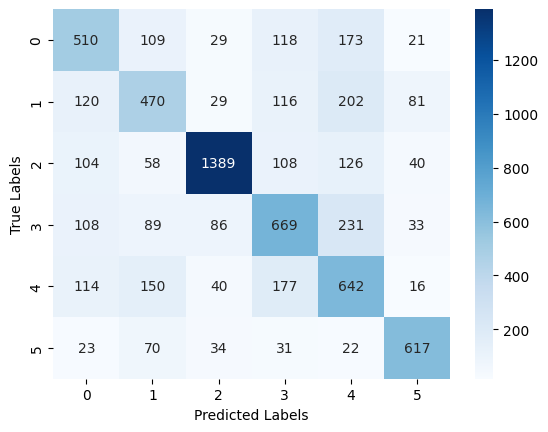

In [27]:
best_valid_loss= np.inf
for i in range(epoch):
    train_loss,train_acc = train_fn(modelo,trainloader,optimizer,i)
    eval_loss,eval_acc = eval_fn(modelo,validloader,i)
    if eval_loss < best_valid_loss:
        torch.save(modelo.state_dict(),'best-weights.pt')
        print("Saved Best Valid Loss")
        best_valid_loss = eval_loss

In [28]:
import joblib

joblib.dump(modelo, 'modelo.pkl')

['modelo.pkl']

In [29]:
import joblib
modelo_cargado = joblib.load('modelo.pkl')

In [30]:
import torch
from torchvision import transforms
from PIL import Image

# Paso 1: Cargar y preprocesar la imagen
image_path = "./images/validation/sad/10004.jpg"
image = Image.open(image_path).convert("RGB")

# Añadir transformaciones necesarias, incluyendo normalización
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image = transform(image)

# Ajusta la dimensión del lote (batch dimension) si es necesario
image = image.unsqueeze(0)

# Paso 2: Mover el modelo a la CPU y realizar la predicción
modelo.to('cpu')  # Mover el modelo a la CPU

output = modelo(image)

# Para obtener las probabilidades de clase en un problema de clasificación
probabilities = torch.nn.functional.softmax(output[0], dim=0)

# Paso 3: Interpretar los resultados
# Puedes obtener la clase predicha como el índice con mayor probabilidad
predicted_class = torch.argmax(probabilities).item()
print(f"La imagen probablemente pertenece a la clase: {predicted_class}")


La imagen probablemente pertenece a la clase: 2


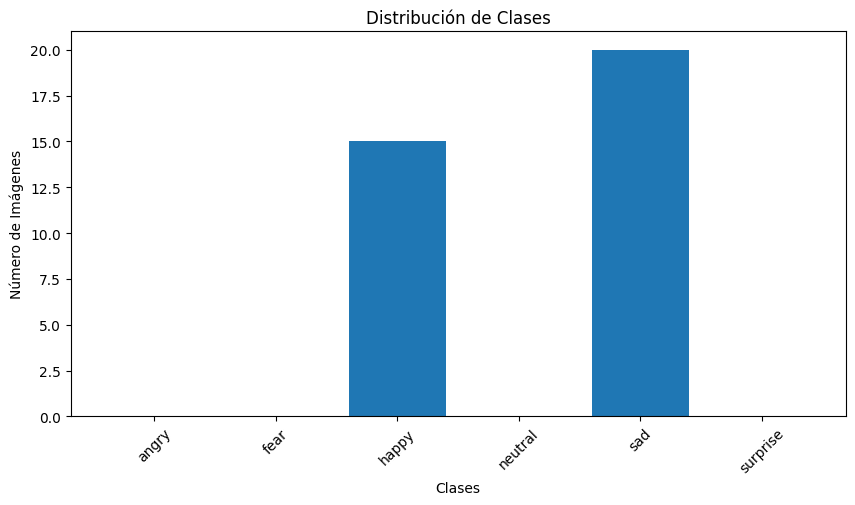

In [35]:
import os
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

folder_path = "./persons/"

transform = transforms.Compose([
    transforms.ToTensor()
])

class_labels = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']

predictions = []
probabilities = []

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path).convert("RGB")
        image = transform(image)
        image = image.unsqueeze(0)

        # Realizar la predicción
        output = modelo(image)
        probabilities_batch = torch.nn.functional.softmax(output[0], dim=0)
        predicted_class = torch.argmax(probabilities_batch).item()

        predictions.append(predicted_class)
        probabilities.append(probabilities_batch)

# Convertir las listas en tensores
predictions = torch.tensor(predictions)
probabilities = torch.stack(probabilities)

# Calcular la distribución de las clases
class_distribution = torch.bincount(predictions, minlength=len(class_labels))

# Graficar
plt.figure(figsize=(10, 5))
plt.bar(class_labels, class_distribution)
plt.xlabel('Clases')
plt.ylabel('Número de Imágenes')
plt.title('Distribución de Clases')
plt.xticks(rotation=45)
plt.show()


In [34]:
## Código para mover archivos a carpeta

# import os
# import shutil

# source_folder = './'

# destination_folder = 'persons/'

# if not os.path.exists(destination_folder):
#     os.makedirs(destination_folder)

# files = os.listdir(source_folder)

# for file in files:
#     if 'person_' in file:
#         source_path = os.path.join(source_folder, file)
#         destination_path = os.path.join(destination_folder, file)
#         shutil.move(source_path, destination_path)


In [32]:
## Código para eliminar archivos en carpeta

# import os

# directory_path = './persons/'
# files = os.listdir(directory_path)

# for file in files:
#     if file.endswith(".jpg"):
#         file_path = os.path.join(directory_path, file)
#         os.remove(file_path)
#         print(f"Deleted: {file_path}")


Deleted: ./persons/person_videoFeliz_frame_0085_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0060_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0265_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0300_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0150_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0290_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0220_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0200_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0215_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0020_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0280_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0315_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0140_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0080_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0180_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0130_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0250_0.jpg
Deleted: ./persons/person_videoFeliz_frame_0195_0.jpg
Deleted: ./persons/person_vi